In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Activation, MaxPooling2D, Dropout, Flatten
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.optimizers import Adam
from keras.models import load_model

C:\Users\ALU Student 100\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ALU Student 100\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ALU Student 100\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\ALU Student 100\anaconda3\lib\site-packages\tensorflow\python\frame

In [2]:
''' Loading the dataset and scaling the pixels of the images for noise reduction ''' 

# load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# one hot encode target values
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# convert from integers to floats
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# normalize to range 0-1
X_train = X_train / 255.0
X_test = X_test / 255.0


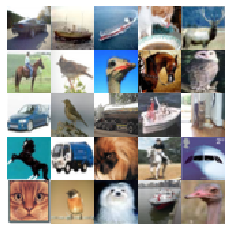

In [3]:
''' Visualizing the images in our dataset '''
# Function that displays cifar images
def display_cifar(images, size):
    n = len(images)
    plt.figure()
    plt.gca().set_axis_off()
    im = np.vstack([np.hstack([images[np.random.choice(n)] for i in range(size)]) for i in range(size)])
    plt.imshow(im)
    plt.show()

# Displaying some pictures
display_cifar(X_train, 5)

In [ ]:
''' In this section we are going to apply convolutional neural networks in detecting objects and classifying their names '''
# Building a convolutional neural network without tuning hyperparameters
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))
# compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=50, batch_size=100, validation_data=(X_test, y_test))

Epoch 1/50
500/500 [==============================] - 3s 6ms/step - loss: 1.4304 - accuracy: 0.4879 - val_loss: 1.1053 - val_accuracy: 0.6083
Epoch 2/50
500/500 [==============================] - 3s 5ms/step - loss: 0.9944 - accuracy: 0.6525 - val_loss: 0.9432 - val_accuracy: 0.6742
Epoch 3/50
500/500 [==============================] - 3s 5ms/step - loss: 0.8332 - accuracy: 0.7115 - val_loss: 0.8754 - val_accuracy: 0.7010
Epoch 4/50
500/500 [==============================] - 3s 5ms/step - loss: 0.7257 - accuracy: 0.7486 - val_loss: 0.8957 - val_accuracy: 0.6962
Epoch 5/50
500/500 [==============================] - 3s 5ms/step - loss: 0.6441 - accuracy: 0.7772 - val_loss: 0.7980 - val_accuracy: 0.7307
Epoch 6/50
500/500 [==============================] - 3s 5ms/step - loss: 0.5673 - accuracy: 0.8029 - val_loss: 0.7968 - val_accuracy: 0.7334
Epoch 7/50
500/500 [==============================] - 3s 5ms/step - loss: 0.5006 - accuracy: 0.8243 - val_loss: 0.8393 - val_accuracy: 0.7295
Epoch 

*It can be spotted from around the epoch number 32 that the model started to overfit (with the loss increasing despite having a higher training accuracy). To solve this issue we will apply the dropout layer for each convolution so that we avoid overfitting*

In [ ]:
# evaluate model
_, acc = model.evaluate(X_test, y_test, verbose=0)
print('The model scored an accuracy of %.3f' % (acc * 100.0))

The model scored an accuracy of 72.420


*An accuracy of 73% on image processing is not bad, but we need to tune hyper-parameters and optimize our model in order to produce a better accuracy.*

In [4]:
''' In this section, we are going to optimize our model '''

# Tunning hyperparameters and applying dropouts in order to avoid overfitting and increasing the CNN layers in our DNN

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2)) # Applying dropout layer for each conv layer
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

# compiling the model
# opt = Adam(lr=0.001)  # Tuning the adam optimizer learning rate for efficiency
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=50, batch_size=100, validation_data=(X_test, y_test))


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
 6100/50000 [==>...........................] - ETA: 4:16 - loss: 2.2221 - acc: 0.1623

KeyboardInterrupt: 

In [6]:
# evaluate model
_, acc = model.evaluate(X_test, y_test, verbose=0)
print('The model scored an accuracy of %.3f' % (acc * 100.0))

The model scored an accuracy of 80.450


*After applying dropouts at each CNN and tuning the parameters in the optimizer, our validation accuracy was able to increase from 73% to 83% with the loss constantly decreasing (not overfitting).*

In [7]:
# Saving the model
model.save('model.sav')

# Reloading the saved model
reloaded_model = tf.keras.models.load_model('model.sav')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [ ]:
from PIL import Image
img = Image.open('horse.jpg')
image = img.resize((32,32),Image.ANTIALIAS)

In [ ]:
img_array = np.asarray(image, dtype='int32')
img_array = img_array.reshape(1, 32, 32, 3)
img_array.shape

(1, 32, 32, 3)

In [ ]:
x = reloaded_model.predict(img_array)

In [ ]:
np.argmax(x, axis=None, out=None)

7

In [ ]:
''' Receiving user input and classifying the image'''

# Receiving file and turning it into an array
def user_image(image):
    image = Image.open('cat.jpg')
    image = image.resize((32,32),Image.ANTIALIAS)
    img_array = np.asarray(image, dtype='int32')
    img_array = img_array.reshape(1, 32, 32, 3)
    prediction = reloaded_model.predict(img_array)
    obj = np.argmax(prediction, axis=None, out=None)
    if obj == 0:
        print("The object is predicted as an aeroplane")
    elif obj == 1:
        print("The object is predicted as an automobile")
    elif obj == 2:
        print("The object is predicted as a bird")
    elif obj == 3:
        print("The object is predicted as a cat")
    elif obj == 4:
        print("The object is predicted as a deer")
    elif obj == 5:
        print("The object is predicted as a dog")
    elif obj == 6:
        print("The object is predicted as a frog")
    elif obj == 7:
        print("The object is predicted as a horse")
    elif obj == 8:
        print("The object is predicted as a ship")
    elif obj == 9:
        print("The object is predicted as a truck")